In [114]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import (
    adjusted_rand_score,
    adjusted_mutual_info_score,
    homogeneity_score,
    completeness_score,
    v_measure_score,
    silhouette_score,
)
from sklearn.model_selection import GridSearchCV

# Лабораторная работа 8

Кластеризация

Выполнила: 6132, Скиданова Анна

0 Найти датасет для кластеризации: для этого берём датасет для мультиклассовой классификации и временно убираем метки классов. Эти метки классов пригодятся нам для оценки качества кластеризации. Хотя в реальной жизни такой роскоши скорее всего не будет, однако наличие априорного знания о кластерах позволит нам посчитать несколько дополнительных метрик. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений.

In [115]:
# Таблица клиентов
df_t = pd.read_csv("abalone.csv", sep="\t")

In [116]:
#Нужно привести DataFrame в нормальный вид, потому что сейчас он выглядит как:
df_t.head()

,"Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings"
0,"M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15"
1,"M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7"
2,"F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9"
3,"M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10"
4,"I,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7"


In [117]:
str1=list(df_t)[0]
name=[] # названия колонок
while(str1.find(",")>0):
    i=0
    name.append(str1[i:str1.find(",")])
    str1=str1[str1.find(",")+1:len(str1)]
name.append(str1)

In [118]:
# DataFrame приведённый к нормальному виду
df = pd.DataFrame() 

for i in range(0,len(df_t)):
    str_n=str(df_t.iloc[i][0])
    sl={}
    k=0
    while(str_n.find(",")>0):
        i=0
        nn=str_n.find(",")
        peace_of_str=str_n[i:nn]
        if(k!=0):
            sl[name[k]]=float(peace_of_str)
        else:
            sl[name[k]]=peace_of_str
        str_n=str_n[nn+1:len(str_n)]
        k=k+1
    sl[name[k]]=float(str_n)
    df = df.append(sl, ignore_index=True)
# и теперь он выглядит
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0


In [119]:
#Теперь можно работать с данными

### Описание данных

In [120]:
df.dtypes 

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings             float64
dtype: object

Пояснение для каждой колонки:
Sex: пол   
Length: максимальная длина раковины   
Diameter: максимальная ширина раковины   
Height: толщина   
Whole weight: общая масса   
Shucked weight: вес мяса   
Viscera weight : вес органов  
Shell weight : вес после сушки   
Rings: возраст

In [121]:
# удаляем метки классов
y1 = df['Rings']
df.pop('Rings')

0       15.0
1        7.0
2        9.0
3       10.0
4        7.0
        ... 
4172    11.0
4173    10.0
4174     9.0
4175    10.0
4176    12.0
Name: Rings, Length: 4177, dtype: float64

1 Выполните иерархическую агломеративную кластеризацию (scipy.cluster.hierarchy), постройте график-дендрограмму (hierarchy.dendrogram)

In [122]:
# переделываем категориальный признак
Ed = df['Sex'].astype('category')
Ed = Ed.cat.codes
df['Sex']=Ed

In [127]:
# Так как dataframe слишком большой оставим только первые несколько элементов
df_c = df.sample(900)
y2=y1.sample(900)

In [128]:
# Иерархическая кластеризация
cl = linkage(df_c, 'average')

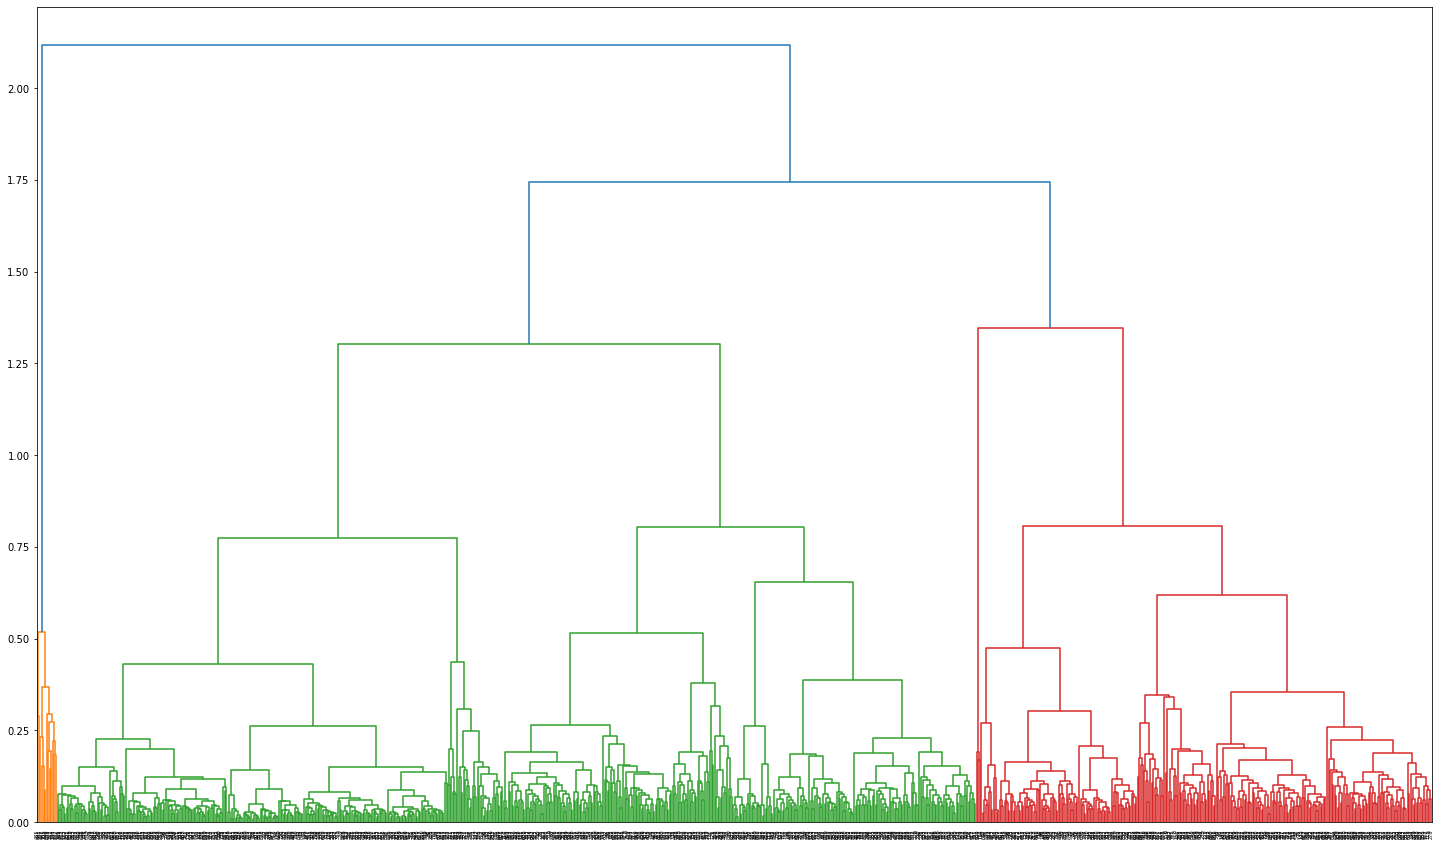

In [130]:
# дендрограмма
fig = plt.figure(figsize=(25, 15))
dn = dendrogram(cl)

2 На том же датасете выподните кластеризацию, используя любой другой метод кластеризации (пока с произвольными гиперпараметрами)

In [93]:
def metrix(X, y, algo):
    return {
        "ARI": adjusted_rand_score(y, algo.labels_),
        "AMI": adjusted_mutual_info_score(y, algo.labels_),
        "Homogeneity": homogeneity_score(y, algo.labels_),
        "Completeness": completeness_score(y, algo.labels_),
        "V-measure": v_measure_score(y, algo.labels_),
        "Silhouette": silhouette_score(X, algo.labels_)
    }

In [94]:
# используем самый простой метод - метод k-средних
n = len(y1.unique())
k_means = KMeans(n_clusters=n, max_iter=100).fit(df)
metrix(df, y1, k_means)

{'ARI': 0.043094042409547374,
 'AMI': 0.1362130124724562,
 'Homogeneity': 0.1800617130938439,
 'Completeness': 0.14099141400953427,
 'V-measure': 0.15814924942254516,
 'Silhouette': 0.3704401834763142}

3 Выполните оптимизацию гиперпараметров кластеризации (либо иерархической модели из п. 1, либо иной модели из п. 2, на ваш выбор; в случае иерархической кластеризации из п. 1 гиперпараметр — пороговое расстояние между центроидами, являющееся границей разбиения на кластеры). Оптимизацию выполните, используя одну из метрик качества кластеризации, для которых нам понадобится информация об исходных метках класса: Adjusted Rand Index (ARI), Adjusted Mutual Information (AMI), Гомогенность, полнота, V-мера.

In [95]:
#Задаём параметры
p = {"n_clusters": range(2,n),
    "init": ["k-means++", "random"],
    "algorithm": ["auto", "full", "elkan"]}

In [100]:
m1 = GridSearchCV(KMeans(), p)

In [101]:
m1.fit(df_c, y2)
metrix(df_c, y2, m1.best_estimator_)

{'ARI': 0.00026967367783222677,
 'AMI': 0.0019912174631047286,
 'Homogeneity': 0.09412529193721554,
 'Completeness': 0.07761049086445933,
 'V-measure': 0.08507382667529426,
 'Silhouette': 0.404265228109409}

4 Используя алгоритм/модель из п. 2 выполните оптимизацию гиперпараметра количества кластеров, используя "правило локтя" (анализируем график силуэта)

In [112]:
# ищем оптимальное количество кластеров по правилу правого локтя
g = []
list_k = list(range(1, 15))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df)
    g.append(km.inertia_)

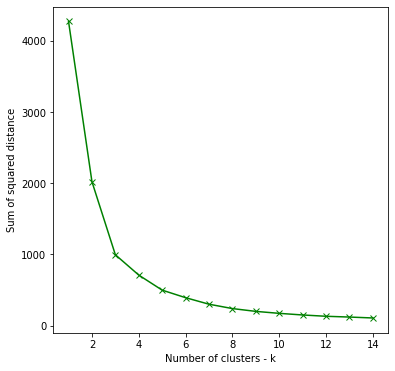

In [113]:
# Строим
plt.figure(figsize=(6, 6))
plt.plot(list_k, g, '-gx')
plt.xlabel(r'Number of clusters - k')
plt.ylabel('Sum of squared distance');

На данном графике сложно определить какое количество кластеров стоит использовать, потому что кривая уменьшается довольно монотонно и нет резкого сгиба. Но думаю что оптимальное количество кластеров = 3